In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Cargar los datos
train_data = pd.read_csv('train.csv')  
test_data = pd.read_csv('test.csv') 

# Vista rápida del conjunto de entrenamiento
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       2350 non-null   int64  
 1   Country                          2350 non-null   object 
 2   Year                             2350 non-null   int64  
 3   Status                           2350 non-null   object 
 4   Adult Mortality                  2350 non-null   float64
 5   infant deaths                    2350 non-null   int64  
 6   Alcohol                          2350 non-null   float64
 7   percentage expenditure           2350 non-null   float64
 8   Hepatitis B                      2350 non-null   float64
 9   Measles                          2350 non-null   int64  
 10   BMI                             2350 non-null   float64
 11  under-five deaths                2350 non-null   int64  
 12  Polio               

In [3]:
# Manejar valores nulos rellenándolos con la media
train_data.fillna(train_data.select_dtypes(include=[np.number]).mean(), inplace=True)
test_data.fillna(test_data.select_dtypes(include=[np.number]).mean(), inplace=True)


# Corregir nombres de columnas eliminando espacios adicionales
train_data.columns = train_data.columns.str.strip()
test_data.columns = test_data.columns.str.strip()

# Eliminar columnas irrelevantes
train_data.drop(columns=['Unnamed: 0', 'Country'], inplace=True)
test_data.drop(columns=['Unnamed: 0', 'Country'], inplace=True)

# Codificación de variables categóricas
train_data = pd.get_dummies(train_data, columns=['Status'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Status'], drop_first=True)

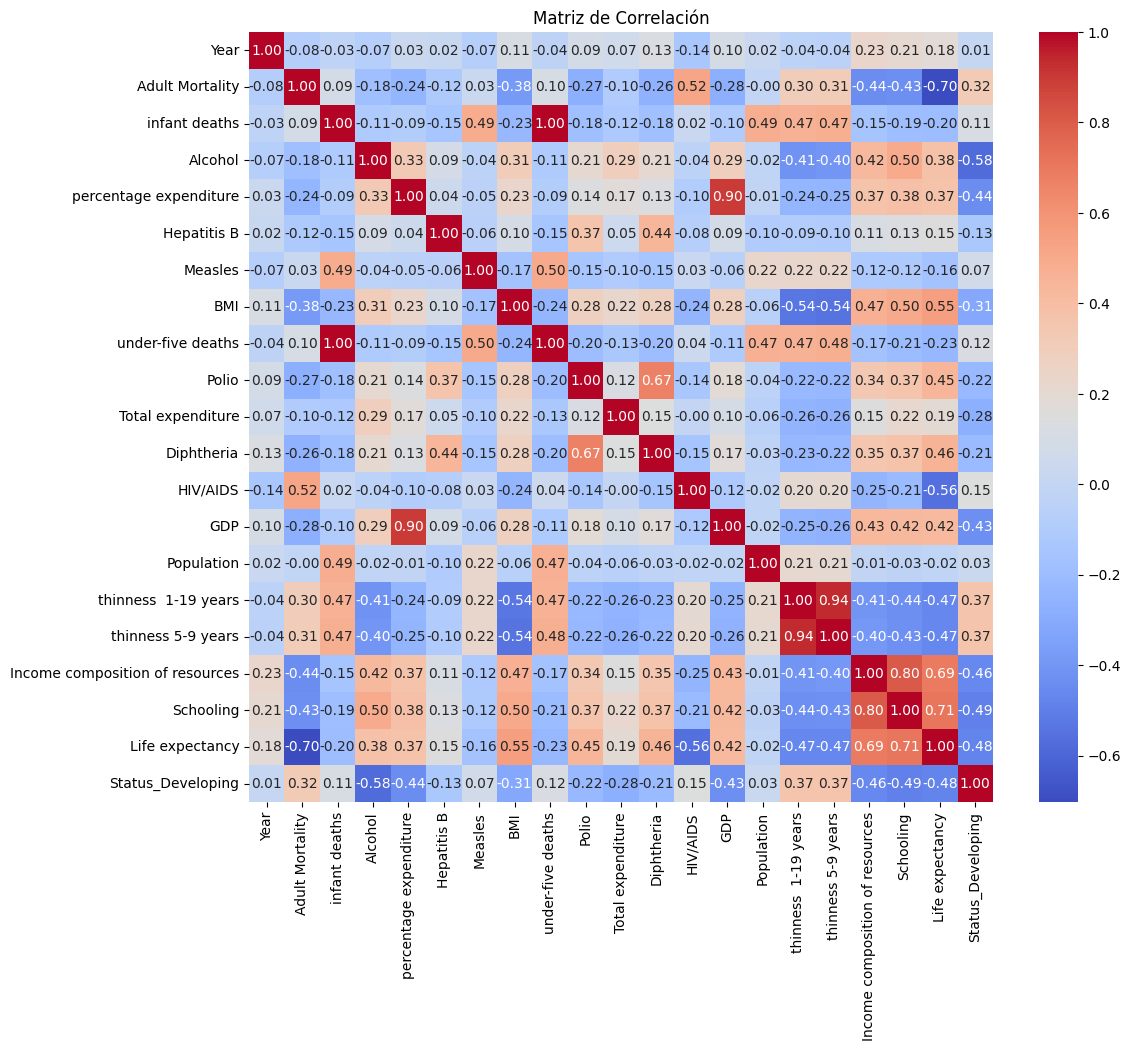

In [4]:
# Separar características y objetivo
X = train_data.drop(columns=['Life expectancy'])
y = train_data['Life expectancy']

# Dividir en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualización: Matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(train_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [5]:
# Entrenar modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model.predict(X_val)
r2 = r2_score(y_val, y_pred)
print(f'R² en el conjunto de validación: {r2:.4f}')

# Generar predicciones en el conjunto de prueba
test_predictions = model.predict(test_data)

# Crear un índice para simular el "ID" requerido
submission = pd.DataFrame({
    'ID': range(1, len(test_predictions) + 1),  # Crear IDs secuenciales desde 1
    'Life expectancy': test_predictions
})

R² en el conjunto de validación: 0.8395


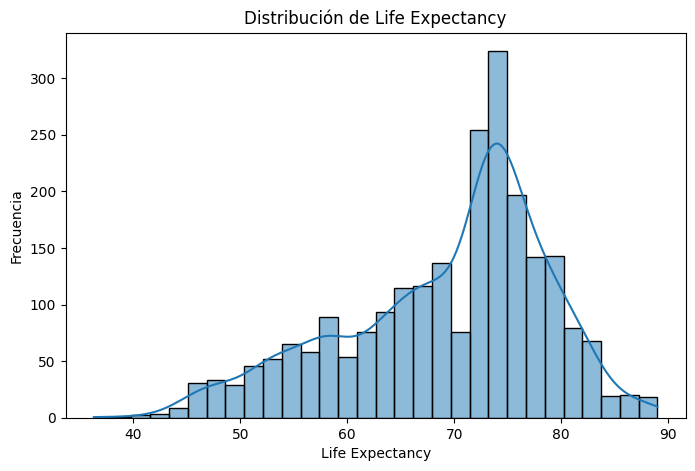

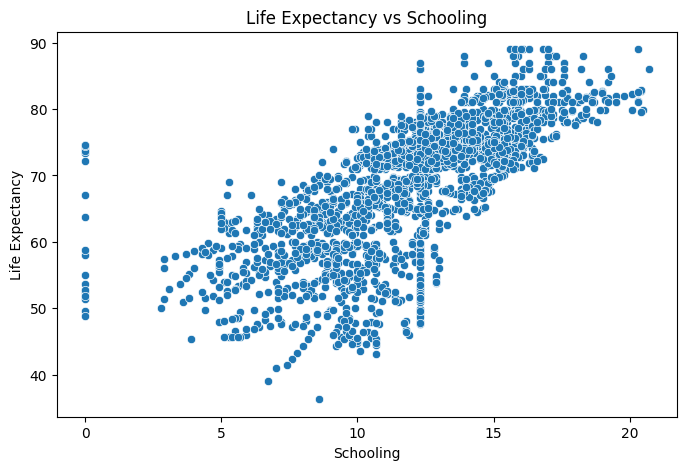

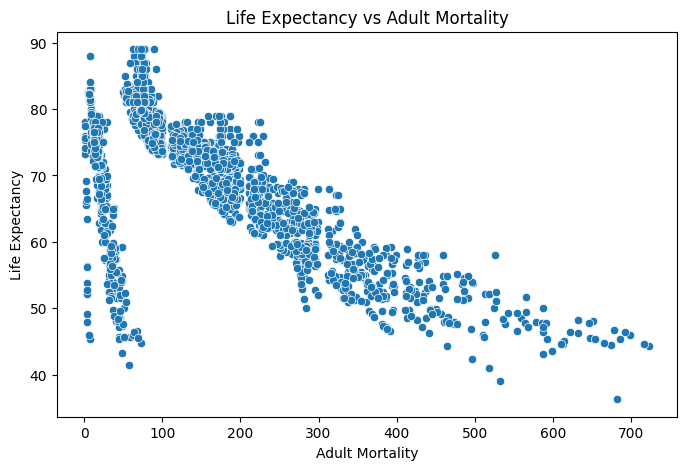

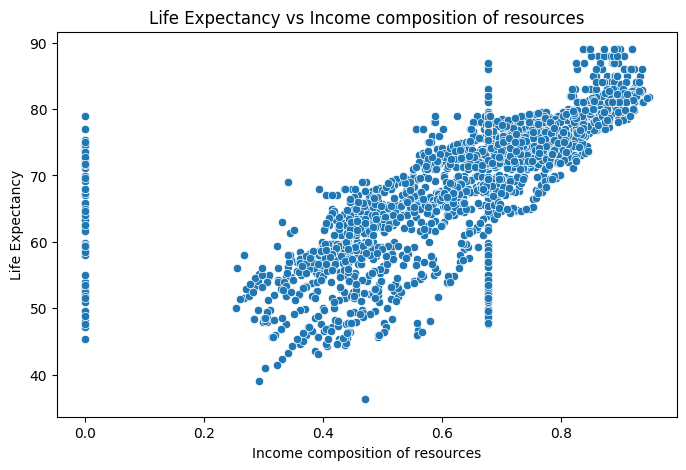

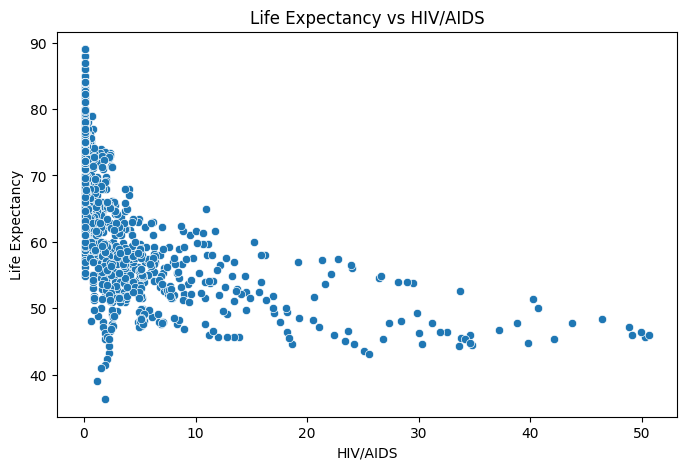

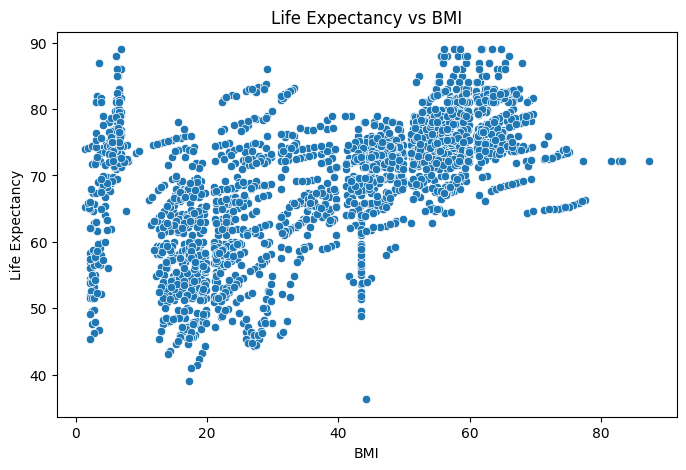

In [6]:
# Guardar el archivo de salida para Kaggle
submission.to_csv('submission.csv', index=False)

# Visualizaciones adicionales
# Distribución de Life expectancy
plt.figure(figsize=(8, 5))
sns.histplot(train_data['Life expectancy'], kde=True, bins=30)
plt.title('Distribución de Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frecuencia')
plt.show()

# Gráficos de dispersión con las variables más correlacionadas
top_corr_features = train_data.corr()['Life expectancy'].abs().sort_values(ascending=False)[1:6].index
for feature in top_corr_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=train_data, x=feature, y='Life expectancy')
    plt.title(f'Life Expectancy vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Life Expectancy')
    plt.show()